#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   García Hernández, Enrique Ricardo. A01315428
*   Chavarria Barrientos, Daniel       A01331204
*   Mateo Comprés, Rafael José.        A01793054
*   García Sabag, Omar Nayib.          A01793008



En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

## Librerías

In [2]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score 
from imblearn.pipeline import make_pipeline
import seaborn as sns 
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import validation_curve
from sklearn import tree
from sklearn.model_selection import GridSearchCV

### **1. Carga de datos**

Comencemos primeramente cargando el archivo con la data que estaremos analizando.

In [3]:
#Actualizar con la ruta donde se está almacenando el archivo
df_original = pd.read_csv('SouthGermanCredit.asc', sep = ' ')
df = df_original.copy() #Hacemos una copia de los datos originales antes de manipularlos
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#### **1.1. Definir nombres de columnas**

Ahora cambiemos los nombres de las columnas del alemán al inglés.

In [4]:
df.columns = ['Status_Checking_Account', 'Duration_Months', 'Credit_History', 'Purpose', 'Credit_Amount', 'Savings_Account', 'Employment_duration', 'Installment_Rate',
              'Personal_Status_Sex', 'Other_Debtors', 'Present_Residence', 'Property', 'Age', 'Other_Installment_Plans', 'Housing', 'Number_Credits', 'Job', 'Financial_Dependents', 
              'Telephone', 'Foreign_Worker', 'Credit_risk']
df.head(5)

,Status_Checking_Account,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_duration,Installment_Rate,Personal_Status_Sex,Other_Debtors,...,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,Financial_Dependents,Telephone,Foreign_Worker,Credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#### **1.2. Información del dataset**
Ahora revisemos los tipos de datos de cada columna y confirmemos que coinciden con la información descrita en el archivo "codetable.txt"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Status_Checking_Account  1000 non-null   int64
 1   Duration_Months          1000 non-null   int64
 2   Credit_History           1000 non-null   int64
 3   Purpose                  1000 non-null   int64
 4   Credit_Amount            1000 non-null   int64
 5   Savings_Account          1000 non-null   int64
 6   Employment_duration      1000 non-null   int64
 7   Installment_Rate         1000 non-null   int64
 8   Personal_Status_Sex      1000 non-null   int64
 9   Other_Debtors            1000 non-null   int64
 10  Present_Residence        1000 non-null   int64
 11  Property                 1000 non-null   int64
 12  Age                      1000 non-null   int64
 13  Other_Installment_Plans  1000 non-null   int64
 14  Housing                  1000 non-null   int64
 15  Numbe

De la tabla anterior se puede apreciar que todas las columnas fueron leídas como tipo entero. Vamos a convertir las columnas de variables categóricas a tipo string.

In [6]:
# #Redefinición de algunas variables
df['Status_Checking_Account'] = df['Status_Checking_Account'].astype(str) #Status de la cuenta,  1: no checking account, 2:< 0 DM, 3: >= & < 200 DM y 4: >= 200 DM
df['Credit_History'] = df['Credit_History'].astype(str) # 0: delay in paying off in the past, 1: critical account/other credits elsewhere, 2: no credits taken/all credits paid back duly, 3: existing credits paid back duly till now, 4: all credits at this bank paid back duly
df['Purpose'] = df['Purpose'].astype(str) # 0: others, 1: car (new), 2: car (used), 3: furniture/equipment, 4: radio/television, 5: domestic appliances, 6: repairs, 7: education, 8: vacation, 9: retraining, 10: business
df['Savings_Account'] = df['Savings_Account'].astype(str) # 1: unknown/no savings account, 2: <100 DM, 3: 100 <= & <  500 DM, 4: 500 <= & < 1000 DM, 5: >= 1000 DM
df['Employment_duration'] = df['Employment_duration'].astype(str) # 1: unemployed, 2: < 1 yr, 3: 1 <= & < 4 yrs, 4: 4 <= & < 7 yrs, 5: >= 7 yrs
df['Installment_Rate'] = df['Installment_Rate'].astype(str) # 1: >= 35, 2: 25 <= ... < 35, 3: 20 <= ... < 25, 4: < 20
df['Personal_Status_Sex'] = df['Personal_Status_Sex'].astype(str) # 1: male: divorced/separated, 2: female: non-single or male : single, 3: male : married/widowed, 4: female : single
df['Other_Debtors'] = df['Other_Debtors'].astype(str) #1: none, 2: co-applicant, 3: guarantor
df['Present_Residence'] = df['Present_Residence'].astype(str) # 1: < 1 yr, 2: 1 <= & < 4 yrs, 3: 4 <= & < 7 yrs, 4: >= 7 yrs
df['Property'] = df['Property'].astype(str) #  1: unknown / no property, 2: car or other, 3: building soc. savings agr./life insurance, 4: real estate
df['Other_Installment_Plans'] = df['Other_Installment_Plans'].astype(str) #1: bank, 2: stores, 3: none
df['Housing'] = df['Housing'].astype(str) # 1: for free, 2: rent, 3: own
df['Number_Credits'] = df['Number_Credits'].astype(str) # 1: 1, 2: 2-3, 3: 4-5, 4: >= 6
df['Job'] = df['Job'].astype(str) # 1: unemployed/unskilled - non-resident, 2: unskilled - resident, 3: skilled employee/official, 4: manager/self-empl./highly qualif. employee
df['Financial_Dependents'] = df['Financial_Dependents'].astype(str) #  1: 3 or more, 2: 0 to 2   


Confirmamos que los cambios se hayan realizado correctamente.

In [7]:
df.dtypes

Status_Checking_Account    object
Duration_Months             int64
Credit_History             object
Purpose                    object
Credit_Amount               int64
Savings_Account            object
Employment_duration        object
Installment_Rate           object
Personal_Status_Sex        object
Other_Debtors              object
Present_Residence          object
Property                   object
Age                         int64
Other_Installment_Plans    object
Housing                    object
Number_Credits             object
Job                        object
Financial_Dependents       object
Telephone                   int64
Foreign_Worker              int64
Credit_risk                 int64
dtype: object

### **2. Partición de los Datos**

#### **2.1. Definir conjunto de entrada (X) y de salida(y)**

Definimos el conjunto de entrada, que serán nuestras variables independientes, así como la variable de respuesta y.

In [8]:
X = df.iloc[:, :-1]
y = df[["Credit_risk"]]

X

,Status_Checking_Account,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_duration,Installment_Rate,Personal_Status_Sex,Other_Debtors,Present_Residence,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,Financial_Dependents,Telephone,Foreign_Worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2


#### **2.2. Separar dataset en conjunto de entrenamiento y conjunto de prueba**

Ahora, realizamos la particición y obtenemos nuestros conjunto para entrenamiento y prueba. Solo realizaremos dos particiones en vez de tres, puesto que estaremos realizando validación cruzada más adelante.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
#Estadísticos de tasa de morosidad (Credit_Risk=1)
y_train.describe() #muestra de entrenamiento

,Credit_risk
count,850.000000
mean,0.701176
std,0.458012
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### **3. Imputación de los datos**

De acuerdo con el archivo codetable.txt, las variables se definen en los siguientes tipos:

**VARIABLES CATEGÓRICAS**
1. Status_Checking_Account
2. Credit_History
3. Purpose
4. Personal_Status_Sex
5. Other_Debtors
6. Property
7. Other_Installment_Plans
8. Housing
9. Savings_Account


**VARIABLES ORDINALES**
1. Employment_duration
2. Installment_Rate
3. Present_Residence
4. Number_Credits
5. Job

**VARIABLES NUMÉRICAS**
1. Duration_Months
2. Credit_Amount
3. Age

**VARIABLES BINARIAS**
1. Telephone
2. Foreign_Worker
3. Credit_risk Tal cual se presenta en la base original, 0=bad, 1=good
4. Credit. En este caso, el 1 es la clase minoritaria, es decir, 1=mal cliente, 0=buen cliente
5. Financial_Dependents

#### **3.1. Exploración de los datos**

Exploremos la data para determinar la mejor estrategia de imputación. Esto lo haremos sobre el conjunto de entrenamientos, ya que por buenas prácticas el conjunto de prueba no lo podemos tocar hasta el final, cuando obtengamos el modelo óptimo. Empecemos primero verificando que no existan datos vacíos.

In [10]:
X_train.isna().any().sum()

0

No existen datos vacíos en nuestro conjunto. Ahora identifiquemos las columnas por su tipo de datos y exploremos las variables continuas con un diagrama de caja.

In [11]:
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas.
numeric_cols = ["Age", "Duration_Months", "Credit_Amount"] #X_train.select_dtypes(include=['float64', 'int64']).columns.to_list() 
cat_cols = ["Status_Checking_Account", "Credit_History", "Purpose", "Personal_Status_Sex", "Other_Debtors", "Property", "Other_Installment_Plans", "Housing", "Savings_Account"]#X_train.select_dtypes(include=['object', 'category']).columns.to_list()
bin_cols = ["Telephone", "Foreign_Worker", "Financial_Dependents"]
ord_cols = ["Employment_duration", "Installment_Rate", "Present_Residence", "Number_Credits", "Job"]

Ahora procedamos a construir el diagrama de caja.

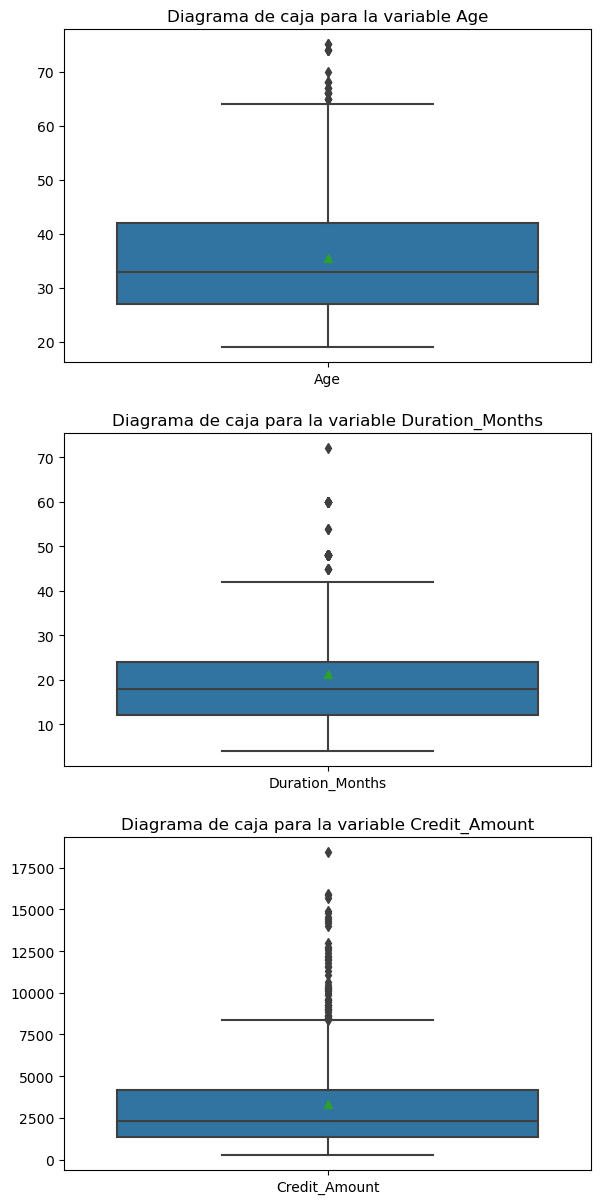

In [12]:
fig, axes = plt.subplots(3,1, figsize=(6,12))
fig.tight_layout(h_pad=3, w_pad=3)

for i in range(len(numeric_cols)):
    axes[i].set_title(f"Diagrama de caja para la variable {numeric_cols[i]}")
    
    sns.boxplot(X_train[[numeric_cols[i]]], ax=axes[i], showmeans=True)

Del gráfico anterior se observa que existe poca variabilidad en los datos, a juzgar por el tamaño de la caja. También esto se puede confirmar notando que la media (triángulo en verde) es muy cercana a la mediana. Sin embargo, se puede evidenciar presencia de datos atípicos en la distribución.

Por lo descrito arriba se recomienda como estrategia de imputación para los datos numéricos la mediana, ya que esta es menos suceptible a valores atípicos. Con relación a las variables categóricas, la estrategia de imputación sera sobre la moda.

Confirmemos lo anterior sacando un resumen estadístico de nuestros datos.

In [13]:
X_train.describe(include="all")

,Status_Checking_Account,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_duration,Installment_Rate,Personal_Status_Sex,Other_Debtors,Present_Residence,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,Financial_Dependents,Telephone,Foreign_Worker
count,850,850.000000,850,850,850.000000,850,850,850,850,850,850,850,850.000000,850,850,850,850,850,850.000000,850.000000
unique,4,NaN,5,10,NaN,5,5,4,4,3,4,4,NaN,3,3,4,4,2,NaN,NaN
top,4,NaN,2,3,NaN,1,3,4,3,1,4,3,NaN,3,2,1,3,2,NaN,NaN
freq,335,NaN,444,232,NaN,516,295,404,467,772,359,288,NaN,694,599,535,537,719,NaN,NaN
mean,NaN,21.231765,NaN,NaN,3309.636471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.569412,NaN,NaN,NaN,NaN,NaN,1.416471,1.963529
std,NaN,12.194408,NaN,NaN,2830.858595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.442714,NaN,NaN,NaN,NaN,NaN,0.493264,0.187568
min,NaN,4.000000,NaN,NaN,276.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,12.000000,NaN,NaN,1361.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000
50%,NaN,18.000000,NaN,NaN,2328.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000
75%,NaN,24.000000,NaN,NaN,4168.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000


Del resumen anterior se evidencia que todas las varibles están dentro de sus valores mínimos y máximos de acuerdo al catálogo/diccionario de datos. Tampoco se aprecian variaciones relevantes en los valores de las variables de naturaleza cuantitativa.

Con el análisis anterior, procedamos a realizar la imputación de lso datos.

In [14]:
# Transformaciones para las variables numéricas
#El estimador que proponemos es la mediana (50% de la población por arriba y por abajo de este punto, evitando no considerar los outliers), en su momento, estandarizaremos las variables numéricas usando la z-score, por eso proponemos la media como el mejor indicador
# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                        ]
                      )

# Transformaciones para las variables categóricas
#Para las variables categórizacas proponemos el equivalente a la moda para distribuciones numéricas, es decir, estaremos imputando usando el valor que más se repite
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols + bin_cols),
                        #Para las variables ordinarias, también se imputan de acuerdo al más frecuente (moda), 
                        #ya que este tipo de variables debe analizarse por distribuciones de frecuencia.
                        ('ord', SimpleImputer(strategy='most_frequent'), ord_cols)
                    ],
                    remainder='passthrough'
                )


In [15]:
#La imputación de valores los aplicamos a las bases tanto de entrenamiento como de validación
X_train_prep= preprocessor.fit_transform(X_train)
X_test_prep= preprocessor.transform(X_test)

In [16]:
from sklearn import set_config
set_config(display='diagram')

preprocessor
#Mostramos la representación de las variables del pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Duration_Months', 'Credit_Amount']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Status_Checking_Account', 'Credit_History',
                                  'Purpose', 'Personal_Status_Sex',
                                  'Other_Debtors', 'Property',
                                  'Other_Installment_Plans', 'Housing',
                                  'Savings_Account', 'Telephone',
                                  'Foreign_Worker', 'Financial_Dependents']),
                                ('ord', SimpleImputer(strategy='most_frequent'),
                                 ['Employment_duration', 'Installment_Rate',
                                  'Present_Residence', 'Number_Credits',
                                  'Job'])])

A continuación se describen los pasos realizados en el bloque anterior:

1. Se elige la mediana como estrategia de imputación, ya que es menos suceptible a valores atípicos.
2. Para las variables categóricos, ordinales y binarias se imputa por la moda (valor más frecuente), ya que este tipo de datos se analizan por medio de distribuciones de frecuencia.
3. Se transforman las variables categóricas y binarias usando el OneHotEncoding. El propósito de esta transformación es para evitar que los algortimos interpreten los números como un grado de importancia de las diferentes categorías en el conjunto de datos. En otras palabras, es evitar que los algoritmos interpreten un número bajo como menos importante y un número alto como más importante.

### **4. Validación cruzada y entrenamiento**

Empecemos primero definiendo las funciones que usaremos para calcular las diferentes métricas de los modelos. Para esto nos apoyaremos de la función confusion_matrix de sklearn

In [17]:
# Funciones para metricas

#accuracy (VP+VN)/(VP+VN+FP+FN)
def mi_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  accuracy = (cm[1,1]+cm[0,0])/(cm[1,1]+cm[0,0]+cm[0,1]+cm[1,0])
  return accuracy


#precision VP/(VP+FP)
def mi_precision(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  precision=cm[1,1]/(cm[1,1]+cm[0,1])
  return precision

#recall / exhaustividad  VP/(VP+FN)
def mi_recall(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  recall=cm[1,1]/(cm[1,1]+cm[1,0])
  return recall

#f1 score 2VP/(2VP+FP+FN)
def mi_f1score(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  f1score= 2 * cm[1,1]/(2*cm[1,1]+cm[1,0]+cm[0,1])
  return f1score

#Gmean SQRT(recall x Especifity)
def mi_gmean(yreal, ypred):
  cm= confusion_matrix(yreal,ypred)
  recall=cm[1,1]/(cm[1,1]+cm[1,0])
  especificidad=cm[0,0]/(cm[0,0]+cm[0,1])
  gmean=np.sqrt(recall*especificidad) 
  return gmean

Ahora definimos las funciones que usaremos para realizar las curvas de aprendizaje y las curvas de validación. Estas funciones son mas bien de apoyo y para uso interno.

In [18]:
#Crea una curva de aprendizaje
def create_learning_curve(model, x_val, y_val, cv, scoring):

  #Se define un pipe tomando como primer
  #paso el column transformer definido arriba
  pipe = Pipeline(steps = [
      ('prep', preprocessor ),
      ('model', model)
  ])

  #Se obtienen 20 tamaños de muestra
  sizes = np.linspace(0.1,1.0, 20)

  return learning_curve(
      estimator=pipe,
      X = x_val,
      y = y_val.values.ravel(),
      train_sizes = sizes,
      cv = cv,
      scoring = scoring["scorer"],
      random_state=42,
      n_jobs=-1 #usamos el argumento n_jobs para agilizar la corrida de la función
       )

In [19]:
#Crea la curva de validación
def create_validation_curve (model, x_val, y_val,cv,scoring ):
    
    pipe = Pipeline(steps = [
      ('prep', preprocessor ),
      ('model', model)
  ])
    #Se prueba el parámetro con 20 valores
    param_range = np.linspace(1,20,20,dtype="int")
    param_name = scoring["param"]

    #Se obtienen los scores
    t_scores, v_scores = validation_curve(
      estimator= pipe,
      X = x_val,
      y = y_val,
      param_name = f"model__{param_name}",
      param_range = param_range,
      cv = cv,
      scoring = scoring["scorer"],
      n_jobs = -1
      )

    return param_range, t_scores, v_scores

In [20]:
#Esta función gráfica las curvas de entrenamiento y validación
def do_plot(x_values, train_scores, test_scores, title, x_label, y_label):
    
    train_avg = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    test_avg = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    plt.figure(figsize=(10,10))
    plt.plot(x_values,train_avg, marker='o', color='red', markersize=8, label="Training")
    plt.fill_between(x_values, train_avg + train_std, train_avg - train_std, color="red", alpha = 0.1)

    plt.plot(x_values, test_avg, marker='+', color='green', markersize=8, label="Validation")
    plt.fill_between(x_values, test_avg + test_std, test_avg - test_std, color="green", alpha = 0.1)
  
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.legend(loc='lower right')
    plt.show()

Ahora definimos las funciones a las que se estará llamando para crear las curvas de aprendizaje y las curvas de validación. Estas funciones son llamadas por el usuario y llamarán a las que se crearon arriba.

In [21]:
#Función para obtener los scores y realizar la curva de aprendizaje
def plot_learning_curve(model, x_val, y_val,cv,scoring ):

  sizes, train_scores, test_scores = create_learning_curve(model["model"], x_val, y_val, cv, model["scores"][scoring]) 
  do_plot(sizes, train_scores, test_scores, f"Curva de aprendizaje para el modelo {model['name']}", "Tamaño de muestra", model["scores"][scoring]["name"])

In [22]:
#Función para obtener los scores y realizar la curva de validación
def plot_validation_curve(model, x_val, y_val,cv, scoring):
    
    param_range, train_scores, test_scores = create_validation_curve(model["model"], x_val, y_val, cv, model["scores"][scoring]) 
    do_plot(
        param_range, 
        train_scores, test_scores,  
        f"Curva de validación para el modelo {model['name']}", 
        model["scores"][scoring]["param"], model["scores"][scoring]["name"])

También definimos una función para imprimir las métricas que arroja el método cross_validate, así como una función para obtener los diferentes modelos que estaremos probando.

In [23]:
#Función para imprimir los scores
def print_scores(score):

    print("Train scores\n")
    print('mean Accuracy: %.3f (%.4f) \nmean Precision: %.3f  (%.4f)\nmean Recall: %.3f (%.4f) \nmean F1-Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' %( 
                                                                          np.mean(score['train_accuracy']),
                                                                          np.std(score['train_accuracy']), 
                                                                          np.mean(score['train_precision']),
                                                                          np.std(score['train_precision']),
                                                                          np.mean(score['train_recall']),
                                                                          np.std(score['train_recall']),
                                                                          np.mean(score['train_f1-score']),
                                                                          np.std(score['train_f1-score']),
                                                                          np.mean(score['train_gmean']),
                                                                          np.std(score['train_gmean']),  
                                                                          ))

    print("Test scores\n")
    print('mean Accuracy: %.3f (%.4f) \nmean Precision: %.3f  (%.4f)\nmean Recall: %.3f (%.4f) \nmean F1-Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (
                                                                          np.mean(score['test_accuracy']),
                                                                          np.std(score['test_accuracy']), 
                                                                          np.mean(score['test_precision']),
                                                                          np.std(score['test_precision']),
                                                                          np.mean(score['test_recall']),
                                                                          np.std(score['test_recall']),
                                                                          np.mean(score['test_f1-score']),
                                                                          np.std(score['test_f1-score']),
                                                                          np.mean(score['test_gmean']),
                                                                          np.std(score['test_gmean']),  
                                                                          ))

Por último, definimos una función que nos devolverá los modelos que estaremos usando en el ejercicio.

In [24]:
#Preparación de modelos y nombres
def get_models():
  models = list() 

  # Regresion lineal
  models.append({
    "name": "Regresión Logística", 
    #Se coloca max_iter = 10,000 para que el modelo pueda converger
    "model": LogisticRegression(max_iter = 10000), 
    "scores": {
      "f1-score": {
        "scorer": make_scorer(mi_f1score),
        "name": "F1 Score"
      }
      }})

  # Arbol Decision
  models.append({
    "name": "Arbol de Decisión", 
    "model": DecisionTreeClassifier(),
    "scores": {
      "f1-score": {
        "param": "max_depth",
        "scorer": make_scorer(mi_f1score),
        "name": "F1 Score"
        },
      "precision": {
        "scorer": make_scorer(mi_precision),
        "param": "max_depth",
        "name": "Precision"
        }, 
    },
    })
   
  # Bosque Aleatorio
  
  models.append({
    "name": "Bosque Aleatorio", 
    "model": RandomForestClassifier(),
    "scores": {
      "recall": {
        "param": "max_depth",
        "scorer": make_scorer(mi_recall),
        "name": "Recall"
        },
    },    
    })
  

  return models 

En este bloque comenzaremos con el proceso de entrenamiento de los modelos.

Métricas para el modelo Regresión Logística

Train scores

mean Accuracy: 0.794 (0.0057) 
mean Precision: 0.819  (0.0047)
mean Recall: 0.905 (0.0070) 
mean F1-Score: 0.860 (0.0040)
Gmean: 0.694 (0.0097)

Test scores

mean Accuracy: 0.752 (0.0285) 
mean Precision: 0.792  (0.0194)
mean Recall: 0.876 (0.0291) 
mean F1-Score: 0.832 (0.0203)
Gmean: 0.634 (0.0409)

Model Chart



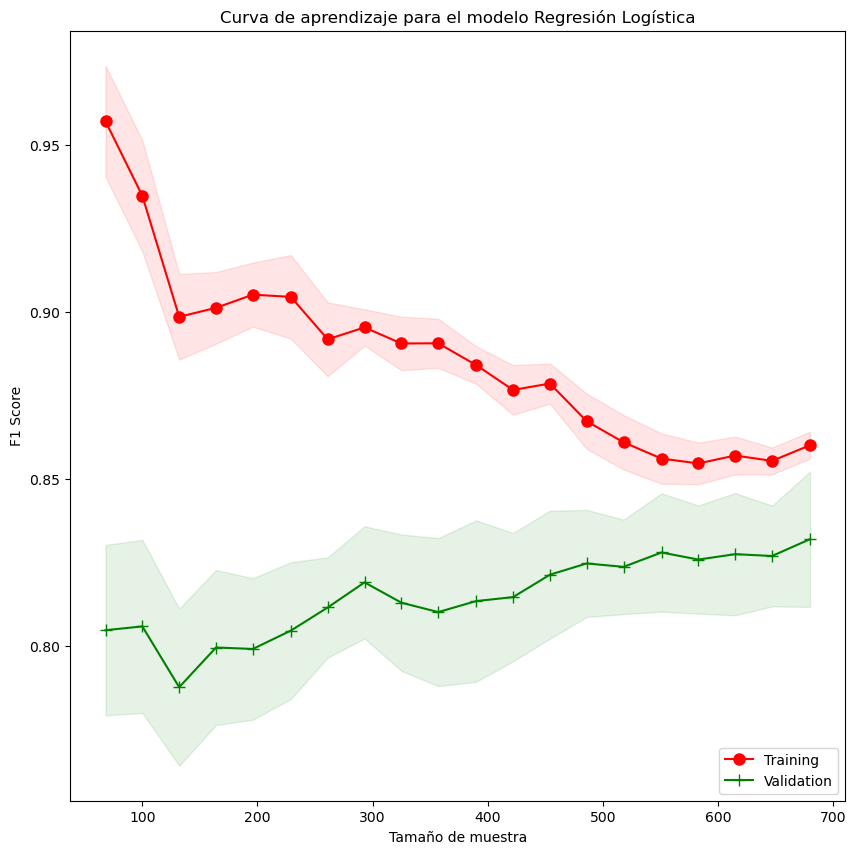

Métricas para el modelo Arbol de Decisión

Train scores

mean Accuracy: 1.000 (0.0000) 
mean Precision: 1.000  (0.0000)
mean Recall: 1.000 (0.0000) 
mean F1-Score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

Test scores

mean Accuracy: 0.688 (0.0310) 
mean Precision: 0.778  (0.0244)
mean Recall: 0.778 (0.0423) 
mean F1-Score: 0.777 (0.0247)
Gmean: 0.607 (0.0490)

Model Chart



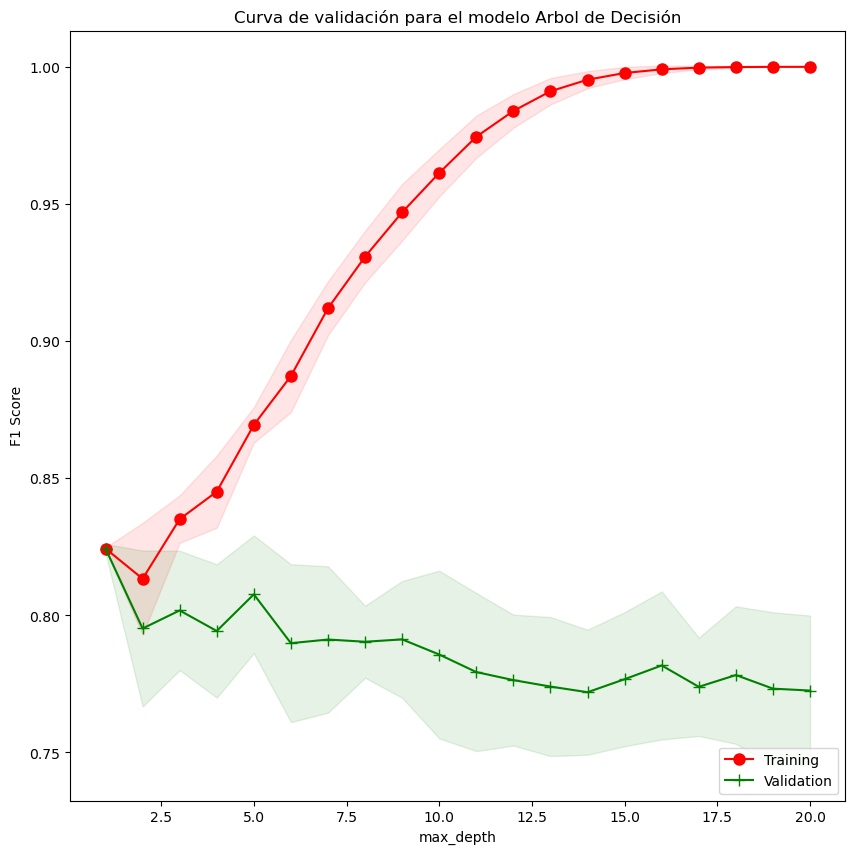

Métricas para el modelo Bosque Aleatorio

Train scores

mean Accuracy: 1.000 (0.0000) 
mean Precision: 1.000  (0.0000)
mean Recall: 1.000 (0.0000) 
mean F1-Score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

Test scores

mean Accuracy: 0.764 (0.0263) 
mean Precision: 0.784  (0.0193)
mean Recall: 0.917 (0.0221) 
mean F1-Score: 0.845 (0.0173)
Gmean: 0.608 (0.0465)

Model Chart



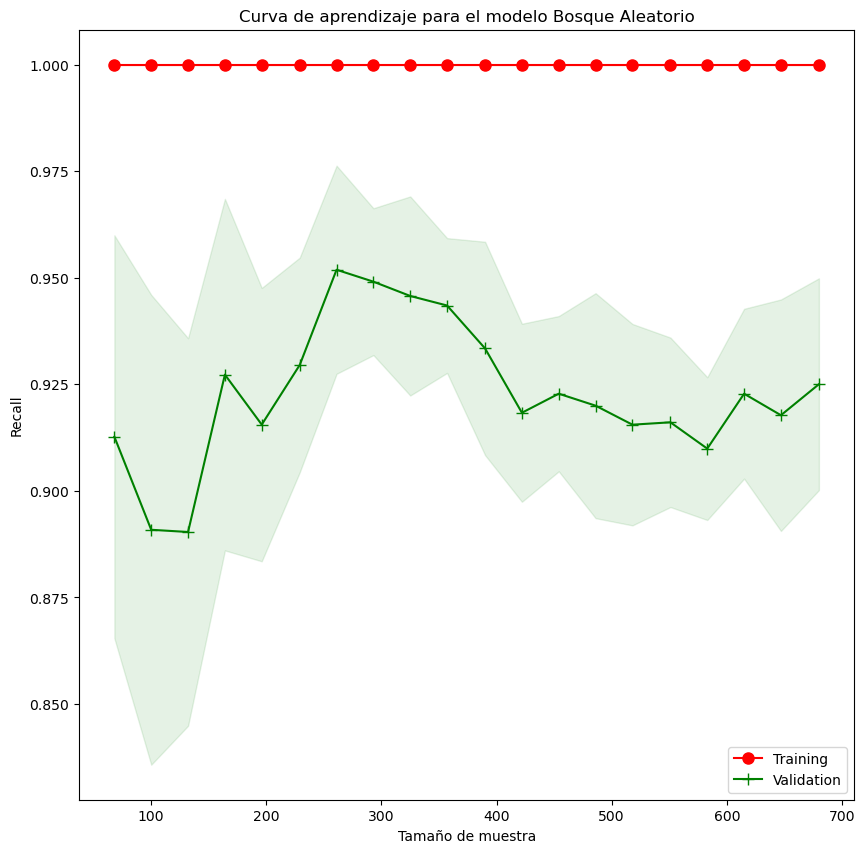


Boxplot chart



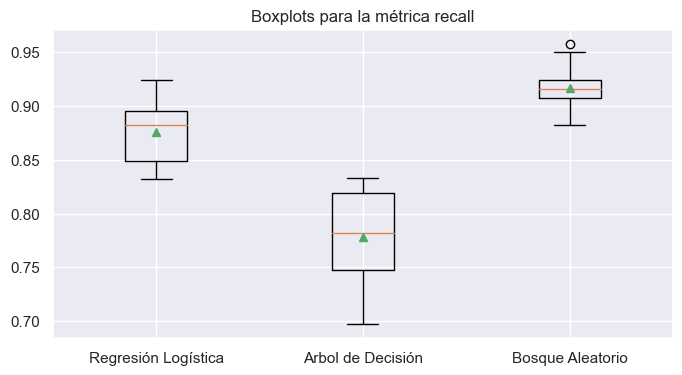

In [25]:
models = get_models()       
scores = list()

for model in models:

  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0) # 5 particiones y 3 repeticiones
  pipe = make_pipeline(preprocessor,model["model"])

  scorings = {
    'accuracy':make_scorer(mi_accuracy),
    'precision': make_scorer(mi_precision),
    'recall':make_scorer(mi_recall), 
    'f1-score':make_scorer(mi_f1score), 
    'gmean': make_scorer(mi_gmean) }

  score = cross_validate(
    pipe, X_train, y_train.values.ravel(),
    scoring=scorings,cv=kfold, return_train_score=True, n_jobs=-1)

  scores.append(score)  
  
  print(f"Métricas para el modelo {model['name']}\n")
  print_scores(score)
  
  print("Model Chart\n")
  if isinstance (model["model"], DecisionTreeClassifier):
    plot_validation_curve(model, X_train, y_train, kfold, 'f1-score')
  elif isinstance (model["model"],RandomForestClassifier):
    plot_learning_curve(model, X_train, y_train, kfold, "recall")
  else:
    plot_learning_curve(model, X_train, y_train, kfold, "f1-score")
  
# Impresion de Diagrama de caja 
sns.set(rc={'figure.figsize':(8,4)})

bpRecall = list()
names = list()
for i in range(len(scores)):
  rr = scores[i]['test_recall']
  names.append(models[i]["name"])
  bpRecall.append(rr)

print("\nBoxplot chart\n")
plt.title("Boxplots para la métrica recall")
plt.boxplot(bpRecall,labels=names,showmeans=True)

plt.show()

**Análisis de los resultados**

**1. Regresión Logística**

Se observa que el modelo presenta sobreentrenamiento, puesto que las métricas del conjunto de entrenamiento es superior (100% todos) en comparación con las métricas de validación.

Lo mismo puede observarse en la curva de aprendizaje con la brecha entre la curva de entrenamiento y validación.

También el modelo evidencia subentrenamiento, puesto que a medida que aumenta el tamaño de las muestras, el desempeño del modelo empeora.

**2. Árbol de Decisión**

Para este modelo, se observa también sobrenentrenamiento como se muestra en las métricas de entrenamiento y validación. También en la curva de validación se observa que el sobreentrenamiento empeora a medida que el parámetro max_depth aumenta.

**3. Bosque Aleatorio**

Por último, este modelo también evidencia sobreentrenamiento como se observa tanto en las métricas como en la curva de aprendizaje.

**4. Desempeño de la métrica recall - Boxplot**

Del diagrama de caja se observa que los modelos de regresión logística y bosque aleatorio tienen un desempeño similar en cuanto a sus medias, siendo el modelo de bosque aleatorio el que tiene la media más alta. También se observa que ambos modelos cuentan con menor variación en comparación con el modelo de Árbol de Decisión.

Si evaluamos los modelos en términos de la métrica F1, los dos que mejor se desempeñaron fueron regresión logística y bosque aleatorio cuando sus parámetros están en valores predeterminados.

### **5. Buscando los mejores parámetros.**

En esta sección estaremos realizan un grid search para encontrar la mejor combinación de parámetros para cada uno de los modelos que hemos estado entrenando.

In [26]:
models

[{'name': 'Regresión Logística',
  'model': LogisticRegression(max_iter=10000),
  'scores': {'f1-score': {'scorer': make_scorer(mi_f1score),
    'name': 'F1 Score'}}},
 {'name': 'Arbol de Decisión',
  'model': DecisionTreeClassifier(),
  'scores': {'f1-score': {'param': 'max_depth',
    'scorer': make_scorer(mi_f1score),
    'name': 'F1 Score'},
   'precision': {'scorer': make_scorer(mi_precision),
    'param': 'max_depth',
    'name': 'Precision'}}},
 {'name': 'Bosque Aleatorio',
  'model': RandomForestClassifier(),
  'scores': {'recall': {'param': 'max_depth',
    'scorer': make_scorer(mi_recall),
    'name': 'Recall'}}}]

#### **5.1. Regresión Logística**

Empezaremos definiendo el grid que le pasaremos al modelo, es decir, las diferentes combinaciones que queremos probar para obtener las mejores predicciones.

Para este modelo usaremos la métrica f1-score.

El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

In [27]:
lr_model = models[0]
pipe = Pipeline(steps = [('transformer', preprocessor), ('model', lr_model['model'])])
kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3)
c_param = [0.01, 0.1, 1, 10, 100, 1000]
grid = [
 
        {'model__penalty': ['l1'], 'model__solver': [ 'saga', 'liblinear'], 'model__class_weight':['balanced', None], 'model__C': c_param},
        {'model__penalty': ['l2'], 'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'model__class_weight':['balanced', None], 'model__C': c_param},
        {'model__penalty': ['elasticnet'], 'model__solver': ['saga'], 'model__class_weight':['balanced', None], 'model__C': c_param, 'model__l1_ratio': [0.5]},
    
]

lr_GS = GridSearchCV(pipe, grid, scoring = lr_model["scores"]["f1-score"]["scorer"], cv = kfold, n_jobs=-1)
lr_GS.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Duration_Months',
                                                                          'Credit_Amount']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('i...
                         {'model__C': [0.01, 0.1, 1, 10, 100, 1000],
                          'model__class_weight': ['balanced', None],
                          'model__penalty': ['l2'],
                          'model__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                            'sag', 'saga']},
                         {'model__C': [0.01, 0.1, 1, 10, 100, 1000],
                          'model__class_weight': ['balanced', None],
                          'model__l1_ratio': [0.5],
                          'model__penalty': ['elasticnet'],
                          'model__solver': ['saga']}],
             scoring=make_scorer(mi_f1score))

In [28]:
print("Mejor Combinación de Parámetros:", lr_GS.best_params_)
print("Mejor Desempeño:", lr_GS.best_score_)

Mejor Combinación de Parámetros: {'model__C': 0.1, 'model__class_weight': None, 'model__l1_ratio': 0.5, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}
Mejor Desempeño: 0.8403951764429113


Ahora grafiquemos la curva de aprendizaje para el mejor modelo de regresión logística.

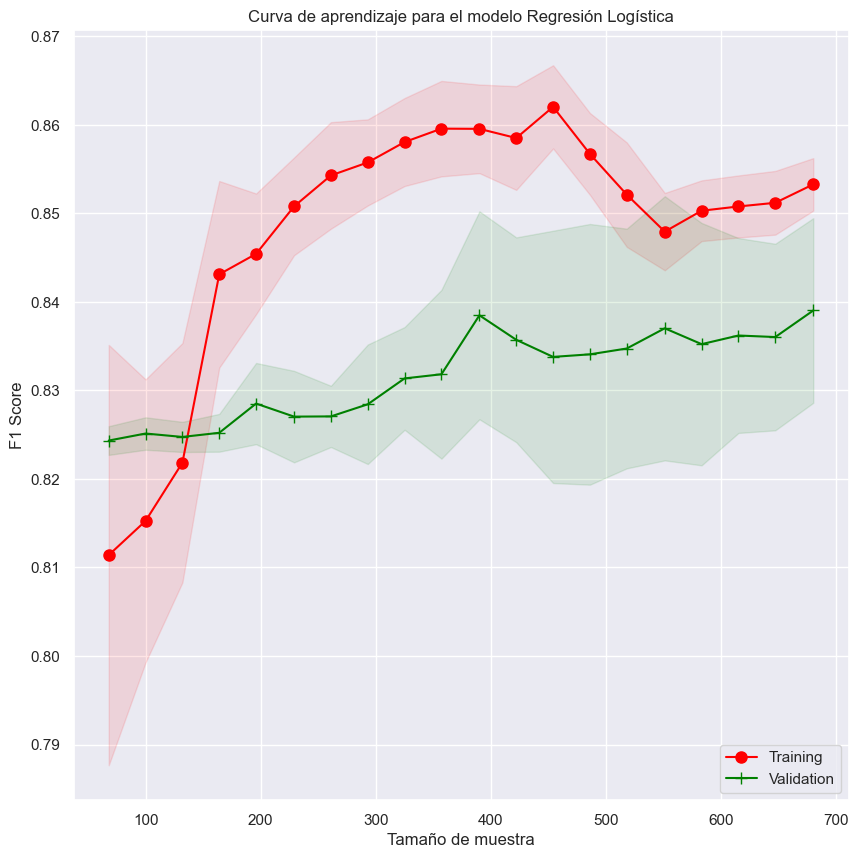

In [29]:
lr_model["model"] = lr_GS.best_estimator_.named_steps["model"]
plot_learning_curve(lr_model, X_train, y_train, kfold, "f1-score")

**Análisis del Modelo**

Se observa que el modelo se encuentra sobreentrenado cuando se considera la métrica f1-score.  Sin embargo, existe posibilidad de que el modelo pueda mejorar con mayores datos de entrenamiento, puesto que la brecha entre la curva de entrenamiento y validación se redujo a medida que el tamaño de muestra fue aumentando.

También se observa que con mayores tamaños de muestra, el bias podría disminuir, ya que tanto la curva de validación como la de entrenamiento muestran una tendencia positiva al aumentar el tamaño del conjunto de entrenamiento. 

#### **5.2. Árbol de Decisión**

In [30]:
dt_model = models[1]
pipe = Pipeline(steps = [('transformer', preprocessor), ('model', dt_model['model'])])
kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3)
grid = {'model__ccp_alpha':[1, 0.1, 0.01, 0.001, 0.0001], 
        'model__criterion':['gini', 'entropy'], 
        'model__max_depth':[1,3,5,10], 
        'model__min_samples_split':np.linspace(0.1,1.0,10),
        'model__class_weight':['balanced', None]}
dt_GS = GridSearchCV(pipe, grid, scoring = dt_model["scores"]["precision"]["scorer"], cv = kfold, n_jobs=-1)
dt_GS.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Duration_Months',
                                                                          'Credit_Amount']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('i...
                                                                          'Number_Credits',
                                                                          'Job'])])),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__ccp_alpha': [1, 0.1, 0.01, 0.001, 0.0001],
                         'model__class_weight': ['balanced', None],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring=make_scorer(mi_precision))

In [31]:
print("Mejor Combinación de Parámetros:", dt_GS.best_params_)
print("Mejor Desempeño:", dt_GS.best_score_)

Mejor Combinación de Parámetros: {'model__ccp_alpha': 0.01, 'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_split': 0.1}
Mejor Desempeño: 0.8776754902230895


Ahora procedemos con la curva de aprendizaje para este modelo con la métrica de precisión. Esta métrica es útil si nos interesa optimizar las predicciones positivas de nuestro conjunto de datos. Es decir, queremos predecir la mayor cantidad de personas de bajo riesgo (clase positiva) posible de forma correcta.

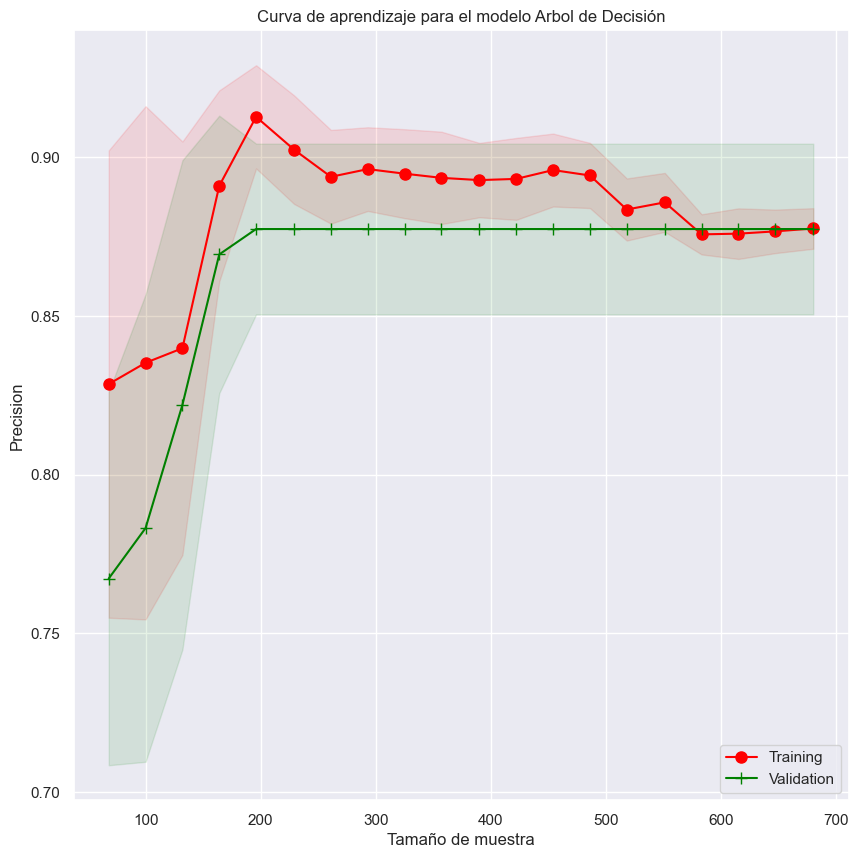

In [32]:
dt_model["model"] = dt_GS.best_estimator_.named_steps["model"]
plot_learning_curve(dt_model, X_train, y_train, kfold, "precision")

**Análisis del Modelo**

En el gráfico podemos observar que para la métrica del precisión el modelo se encuentra subentranado. No se evidencia que el modelo pueda mejorar al aumentar el tamaño de las muestras. Esto puede evidenciarse estudiando las curvas de entrenamiento y validación, pues estas nor mejoran al aumentar el tamaño de la muestra. De hecho, a partir del tamaño de muestra de 500 observaciones en adelante se puede ver como la curva de entrenamiento cae por debajo de la curva de validación.

#### **5.3. Random Forest**

In [33]:
rf_model = models[2]
pipe = Pipeline(steps = [('transformer', preprocessor), ('model', rf_model['model'])])
kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3)
grid = {
    'model__ccp_alpha':[1, 0.1, 0.01, 0.001, 0.0001], 
    'model__criterion':['gini', 'entropy'], 
    'model__max_depth':[1,3,5,10], 
    'model__min_samples_split':[0.1,0.5,1.0],
    'model__class_weight':['balanced', None]}
rf_GS = GridSearchCV(pipe, grid, scoring = rf_model["scores"]["recall"]["scorer"], cv = kfold, n_jobs=-1)
rf_GS.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Duration_Months',
                                                                          'Credit_Amount']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('i...
                                                                          'Installment_Rate',
                                                                          'Present_Residence',
                                                                          'Number_Credits',
                                                                          'Job'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__ccp_alpha': [1, 0.1, 0.01, 0.001, 0.0001],
                         'model__class_weight': ['balanced', None],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__min_samples_split': [0.1, 0.5, 1.0]},
             scoring=make_scorer(mi_recall))

In [34]:
print("Mejor Combinación de Parámetros:", rf_GS.best_params_)
print("Mejor Desempeño:", rf_GS.best_score_)

Mejor Combinación de Parámetros: {'model__ccp_alpha': 1, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_split': 0.1}
Mejor Desempeño: 1.0


Realicemos la curva de validación para este modelo con la métrica recall. Esta métrica es importante si nos interesa optimizar el modelo para minimizar los falsos negativos. En otras palabras, si el costo de identificar incorrectamente a una persona de bajo riesgo (clase positiva) como una de bajo riesgo (clase negativa) es muy alto, entonces recall es la métrica que debemos de utilizar.

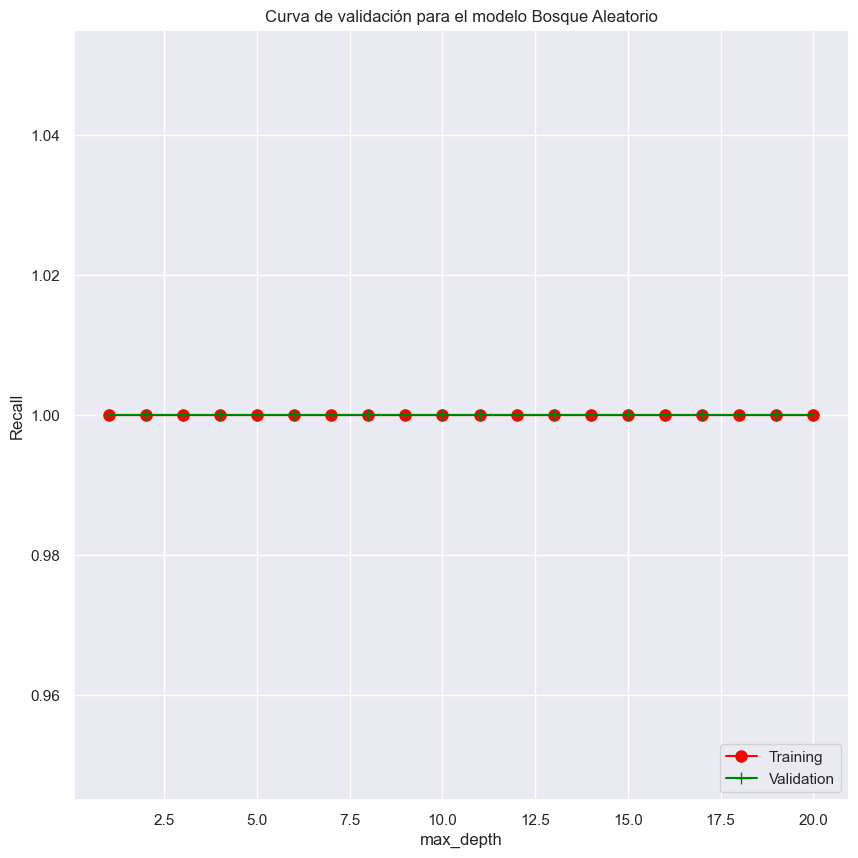

In [35]:
rf_model["model"] = rf_GS.best_estimator_.named_steps["model"]
plot_validation_curve(rf_model, X_train, y_train.values.ravel(), kfold, 'recall')

**Análisis del Modelo**

Para este último caso se observa que el modelo no tuvo falsos negativos, por lo que fue capaz de predecir todas las personas de bajo riesgo sin equivocarse en sus predicciones. Es decir, no se identificó a una persona de bajo riesgo como de alto riesgo.

En conclusión, si se desea optimizar el recall, entonces este modelo sería adecuado para los fines.

### **6. Seleccionando los mejores modelos**

#### **Regresión Logística**

A continuación, estaremos seleccionando el mejor modelo de regresión logística e imprimir el f1-score.

In [36]:
#Mejor modelo de LG

#Obtenemos el mejor model del grid. Esto nos regresará el pipe.
lg_best_model = lr_GS.best_estimator_

#Realizamos el entrenamiento del modelo con todo los datos del conjunto de entrenamiento y obtenemos las predicciones.

lg_best_model.fit(X_train, y_train.values.ravel())
predicted = lg_best_model.predict(X_test)

print("Métrica f1-score: %.3f \n" %(mi_f1score(y_test, predicted)))


Métrica f1-score: 0.835 



**Conclusiones**

Se evidencia un f1-score de 0.825, lo cual indica un balance entre las métricas de recall y precision. Si para el banco le cuesta mucho equivocarse tanto identificando a una persona como de bajo riesgo crediticio cuando realmente es de alto riesgo, así como una persona de alto riesgo cuando realmente es de bajo riesgo, entonces este modelo podría ser un candidato para utilizarse para estas predicciones.

También, como se comentó arriba, al agregarle mayores datos el modelo se tiene la posibilidad de que este mejore en su desempeño.

### **Árbol de decisión**

Ahora seleccionaremos el mejor modelo del árbol de decisión.

Métrica de precisión: 0.915 



[Text(0.5, 0.75, 'Employment_duration <= 0.5\ngini = 0.5\nsamples = 850\nvalue = [425.0, 425.0]\nclass = Bajo riesgo (good)'),
 Text(0.25, 0.25, 'gini = 0.47\nsamples = 515\nvalue = [356.398, 215.352]\nclass = Alto riesgo (bad)'),
 Text(0.75, 0.25, 'gini = 0.372\nsamples = 335\nvalue = [68.602, 209.648]\nclass = Bajo riesgo (good)')]

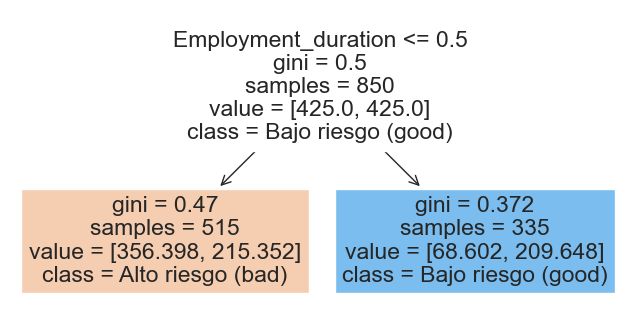

In [44]:
dt_best_model = dt_GS.best_estimator_

dt_best_model.fit(X_train, y_train)
predicted = dt_best_model.predict(X_test)

print("Métrica de precisión: %.3f \n" %(mi_precision(y_test, predicted)))

#Obtenemos el demolo del paso "model" que se encuentra en el pipe
tree.plot_tree(
    dt_best_model.named_steps["model"], 
    feature_names=X_test.columns, filled = True, 
    class_names = ["Alto riesgo (bad)", "Bajo riesgo (good)"])

**Conclusiones**

Se aprecia una precisión de 0.915, un valor muy similar a los obtenidos con los datos de entrenamiento. 

Si para el banco sale mas caro identificar como bajo riesgo a una persona que realmente es de alto riesgo, entonces este modelo podría ser un buen candidato. Sin embargo, es importante destacar que de acuerdo a la curva de aprendizaje mostrada arriba, este modelo no tiene capacidad de seguir mejorando a medida que se agregan más muestras. 

### **Bosque Aleatorio**

Por último, obtengamos el mejor modelo de bosque aleatorio.

In [38]:
rf_best_model = rf_GS.best_estimator_

rf_best_model.fit(X_train, y_train.values.ravel())
predicted = rf_best_model.predict(X_test)

print("Métrica de recall: %.3f \n" %(mi_recall(y_test, predicted)))

Métrica de recall: 1.000 



**Conclusiones**

Como era de esperarse, este modelo funciona muy bien si el objetivo es el recall. En otras palabras, si para el banco sale más costoso identificar a una persona como de bajo riesgo cuando realmente es de alto riesgo (falso negativo), entonces este modelo podría ser el más apropiado de todos, ya que logró identificar correctamente todas las clases positivas (bajo riesgo).

### **7. Conclusiones Finales**

De los modelos obtenidos en este ejercicio se observan que algunos se desempeñan mejor que otros dependiendo de la métrica que se escoja. Por tanto, la selección del mejor modelo dependerá del caso del negocio y que le resulte mejor para la organización que lo adopte.

Para estas conclusiones nos apoyaremos de la sigueinte matriz de confusión:


|                 | Negativa - Alto Riesgo (predicción)                               | Positiva - Bajo riesgo (predicción)                               |
|-----------------|-------------------------------------------------------------------|-------------------------------------------------------------------|
| Negativa (real) | Verdadero Negativo  (se identificó correctamente un alto riesgo)  | Falso Positivo (se identificó incorrectamente un alto riesgo)     |
| Positiva (real) | Falso Negativo (Se identificó incorrectamente un bajo riesgo)     | Verdadero Positivo (Se identificó correctamente  un bajo riesgo)  |


1. Si el banco desea optimizar en función de obtener la mayor cantidad de predicciones correctas posibles, entonces debe seleccionar el modelo con el mejor valor para la métrica "exactitud".

2. Si el banco desea minimizar los falsos positivos, es decir, la cantidad de personas de bajo crédito que fueron identificadas como de buen crédito, entonces el mejor modelo es aquel que tenga el mejor desempeño en la métrica de precisión.
   
3. Si el banco desea minimizar los falsos negativos, es decir, la cantidad de personas de bajo riesgo identificadas como personas de alto riesgo, entonces debe escoger el modelo que mejor optimizar la métrica recall.
   
4. Por último, si el banco desea obtener un balance entre recall y precisión, puesto que ambas predicciones son importantes, entonces debe seleccionar el modelo que mejor optimice la métrica f1.

En este ejercicio se analizaron algunas métricas para cada modelo, pero no todas, por lo que antes de realizar una recomendación cuál es el modelo más optimo en función de su métrica, sería importante revisar el comportamiento de los modelos en para cada una de estas métricas.

#### **8. Bibliografía**

* Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. Sebastopol: O’Reilly Media
* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An Introduction to Statistical Learning (2da ed.).

###**Fin de la Actividad de la semana 6.**